# Imports

In [11]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [12]:
n = 6 # 5~9
label_name = "stat4" # update stat number
layers = [6, 2] # mess with the layers (last layer should be the number of possibilities for this stat)

epochs = 3000 # increase if the loss is still decreasing by the end of training
train_split, test_split = 0.8, 0.2
learning_rate = 0.001 # don't change probably
momentum = 0.9 # don't change probably
batch_size = 64 # higher acc and longer runtime if smaller

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [13]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [14]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 6.145008981227875
Epoch 1, Loss 6.139446437358856
Epoch 2, Loss 6.133480668067932
Epoch 3, Loss 6.125617325305939
Epoch 4, Loss 6.1188289523124695
Epoch 5, Loss 6.109825611114502
Epoch 6, Loss 6.10185432434082
Epoch 7, Loss 6.095356822013855
Epoch 8, Loss 6.0860331654548645
Epoch 9, Loss 6.076584875583649
Epoch 10, Loss 6.068092703819275
Epoch 11, Loss 6.060112357139587
Epoch 12, Loss 6.051155686378479
Epoch 13, Loss 6.042123258113861
Epoch 14, Loss 6.031567871570587
Epoch 15, Loss 6.021236538887024
Epoch 16, Loss 6.010878324508667
Epoch 17, Loss 6.000258922576904
Epoch 18, Loss 5.990930616855621
Epoch 19, Loss 5.978545665740967
Epoch 20, Loss 5.9687220454216
Epoch 21, Loss 5.958039820194244
Epoch 22, Loss 5.946561872959137
Epoch 23, Loss 5.9359718561172485
Epoch 24, Loss 5.925551652908325
Epoch 25, Loss 5.9116944670677185
Epoch 26, Loss 5.898268103599548
Epoch 27, Loss 5.885963022708893
Epoch 28, Loss 5.873721480369568
Epoch 29, Loss 5.860633134841919
Epoch 30, Loss 5.84

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

C:\Users\lewil\AppData\Local\Temp\ipykernel_7372\2152728193.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


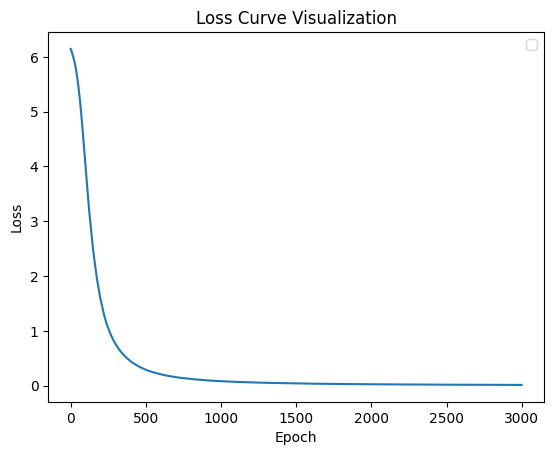

In [15]:
# plot loss vs epoch
plt.plot([i for i in range(epochs)], losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss Curve Visualization')
plt.legend()
plt.savefig(f'figures/loss_curve_{label_name}_{n}.png')

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[94, 0], [0, 50]]


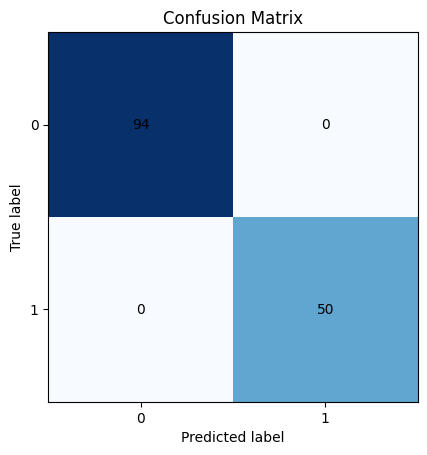

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


In [16]:
confusion_matrix = evaluate_model(model, test_dataset) # try training_dataset and test_dataset

print(confusion_matrix)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

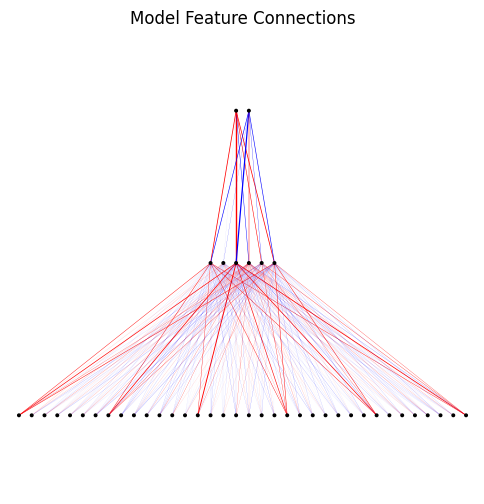

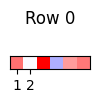

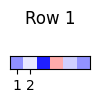

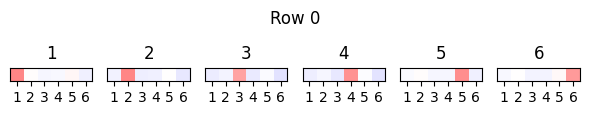

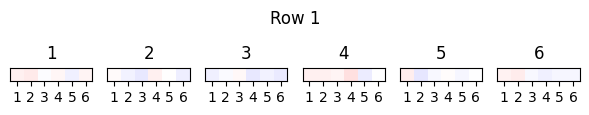

In [17]:
model.plot_connections()

model.plot_heatmap_feature(1, 0)
model.plot_heatmap_feature(1, 1)

model.plot_heatmap_feature(0, 0)
model.plot_heatmap_feature(0, 1)